###  THE TITANIC AND MOVIE DATASETS

In [25]:
from itertools import product

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import naive_bayes
from sklearn.ensemble import GradientBoostingClassifier

### Titanic

1.Read in the titanic data set. Use a for loop to find the best nearest neighbor parameter. 

In [14]:
df = pd.read_csv('data/titanic.csv')

df = df.drop(columns = ['Name'])
one_hot = pd.get_dummies(df['Sex'])
df = df.join(one_hot)
df = df.drop(columns = ["Sex"])
df.head()

X = df.drop(columns = ['Survived'])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=.30, random_state=4444)

for i in range(1,20):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)

    print(i, model.score(X_test, y_test))

1 0.7378277153558053
2 0.6891385767790262
3 0.6928838951310862
4 0.6741573033707865
5 0.700374531835206
6 0.7228464419475655
7 0.6891385767790262
8 0.6928838951310862
9 0.6853932584269663
10 0.6966292134831461
11 0.7078651685393258
12 0.7078651685393258
13 0.7078651685393258
14 0.704119850187266
15 0.7116104868913857
16 0.7078651685393258
17 0.6891385767790262
18 0.704119850187266
19 0.704119850187266


2.Now use GridSearchCV to find the optimal parameter.

In [18]:
from sklearn.model_selection import GridSearchCV

# create a parameter grid: map the parameter names to the values that should be searched
# Grid search uses all the parameters

param_grid = {'n_neighbors': range(1, 20)}

model = GridSearchCV(KNeighborsClassifier(), 
                    param_grid, 
                    cv=5, 
                    scoring='accuracy')

model = model.fit(X_train, y_train)

print(model.best_params_, model.best_estimator_)

model = model.best_estimator_

print(model.score(X_test, y_test))

{'n_neighbors': 19} KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=19, p=2,
           weights='uniform')
0.704119850187266


3.Print a classification report. Describe in words what the recall and precision represent.

In [22]:
classification_report(y, model.predict(X))

'              precision    recall  f1-score   support\n\n           0       0.74      0.85      0.79       545\n           1       0.68      0.51      0.59       342\n\n   micro avg       0.72      0.72      0.72       887\n   macro avg       0.71      0.68      0.69       887\nweighted avg       0.72      0.72      0.71       887\n'

4.Print a confusion matrix. How many people got classified incorrectly? Make sure you understand which category is which.

In [23]:
confusion_matrix(y, model.predict(X))

array([[463,  82],
       [166, 176]])

5.Plot an ROC curve comparing Naive Bayes, Logistic Regresion, Gradient Boosting, and K Nearest Neighbors.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)


model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)

# accuracy for test & train:    
y_proba_NB = model.predict_proba(X_test)[:, 1]

#calculate AUC
print('NB accuracy:', model.score(X_test,y_test))
print('ROC-AUC:', roc_auc_score(y_test, y_proba_NB))


model = LogisticRegression(multi_class = "auto", solver = 'lbfgs', max_iter=10000)
model.fit(X_train, y_train)

# accuracy for test & train:    
y_proba_LR = model.predict_proba(X_test)[:, 1]

#calculate AUC
print('LR accuracy:', model.score(X_test,y_test))
print('ROC-AUC:', roc_auc_score(y_test, y_proba_LR))

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# accuracy for test & train:    
y_proba_GB = model.predict_proba(X_test)[:, 1]

#calculate AUC
print('GB accuracy:', model.score(X_test,y_test))
print('ROC-AUC:', roc_auc_score(y_test, y_proba_GB))

model = KNeighborsClassifier(n_neighbors=19)
model.fit(X_train, y_train)

# accuracy for test & train:    
y_proba_KNN = model.predict_proba(X_test)[:, 1]

#calculate AUC
print('KNN accuracy:', model.score(X_test,y_test))
print('ROC-AUC:', roc_auc_score(y_test, y_proba_KNN))



NB accuracy: 0.8018018018018018
ROC-AUC: 0.8659855257556407
LR accuracy: 0.8243243243243243
ROC-AUC: 0.8791826309067688
GB accuracy: 0.8648648648648649
ROC-AUC: 0.8852277564921244
KNN accuracy: 0.6801801801801802
ROC-AUC: 0.7236270753512133


6.Plot ROC curves comparing the four methods.

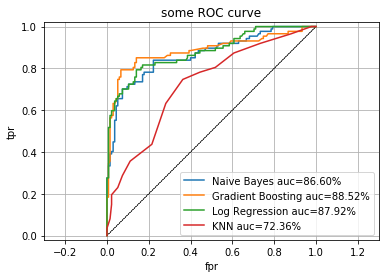

In [32]:
def plot_roc(ytrue, yproba, model, title='some ROC curve'):
    auc = roc_auc_score(ytrue, yproba)
    fpr, tpr, thr = roc_curve(ytrue, yproba)
    plt.plot([0, 1], [0, 1], color='k', linestyle='--', linewidth=.4)
    plt.plot(fpr, tpr, label='{} auc={:.2f}%'.format(model, auc*100))
    plt.axis('equal')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('tpr')
    plt.xlabel('fpr')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)
    
plot_roc(y_test, y_proba_NB, "Naive Bayes")
plot_roc(y_test, y_proba_GB, "Gradient Boosting")
plot_roc(y_test, y_proba_LR, "Log Regression")
plot_roc(y_test, y_proba_KNN, "KNN")

### MOVIE

7.Read in this movie dataset below. Drop the Title, Director, and ReleaseDate columns. Then use a logistic regression. What is the test accuracy?

In [84]:
df = pd.read_csv('data/2013_movies.csv', index_col = 0)

df = df.drop(columns = ['Title', 'Director', 'ReleaseDate'])
y = df['Rating']
X = df.drop(columns = ['Rating'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

model = LogisticRegression(multi_class = "auto", solver = 'lbfgs', max_iter=10000)
model.fit(X_train, y_train)
print('accuracy:', model.score(X_test,y_test))


accuracy: 0.4583333333333333


8.Print the classes and the confusion matrix for the classes. What were most movies predicted to be?

In [85]:
print(model.classes_)
confusion_matrix(y, model.predict(X))

['G' 'PG' 'PG-13' 'R']


array([[ 0,  0,  0,  1],
       [ 0,  0, 13,  1],
       [ 1,  0, 42,  2],
       [ 2,  0, 25,  9]])

9.Print the classification report. Any interesting findings?

In [87]:
classification_report(y, model.predict(X)).split('\n')

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


['              precision    recall  f1-score   support',
 '',
 '           G       0.00      0.00      0.00         1',
 '          PG       0.00      0.00      0.00        14',
 '       PG-13       0.53      0.93      0.67        45',
 '           R       0.69      0.25      0.37        36',
 '',
 '   micro avg       0.53      0.53      0.53        96',
 '   macro avg       0.30      0.30      0.26        96',
 'weighted avg       0.51      0.53      0.45        96',
 '']